## IMPORTING ALL LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder , OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

Load the Dataset

In [ ]:
df = pd.read_csv("WineQT.csv")

Preview the Data

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.sample(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
601,10.6,0.50,0.45,2.6,0.119,34.0,68.0,0.99708,3.23,0.72,10.9,6,842
736,9.3,0.49,0.36,1.7,0.081,3.0,14.0,0.99702,3.27,0.78,10.9,6,1048
373,9.9,0.63,0.24,2.4,0.077,6.0,33.0,0.99740,3.09,0.57,9.4,5,529
460,6.7,0.42,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.3,6,649


Describe the data info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

conclusion: Inside the dataset all columns are numeric so there is no need to Encoding

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


### Check the Missing Values or Not

In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


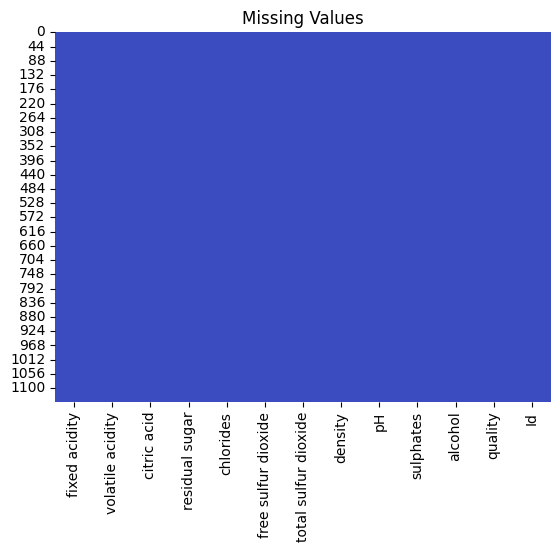

In [ ]:
sns.heatmap(df.isnull(),cmap='coolwarm',cbar=False)
plt.title("Missing Values")
plt.show()

conl: There is no missing values inside the dataset

In [ ]:
df.duplicated().sum()

np.int64(0)

conl: There is no duplicated values its a pure clean data no need to fill values

In [ ]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


<Axes: >

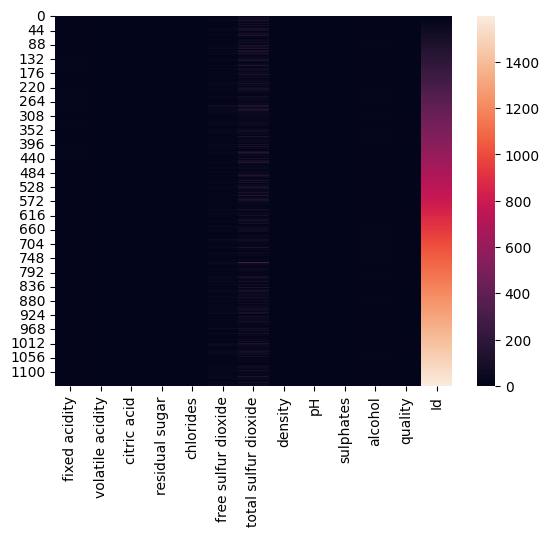

In [ ]:
sns.heatmap(df)

### Drop Unnecessary columns

In [ ]:
df = df.drop(["Id"],axis = 1)

### Outlier Detection

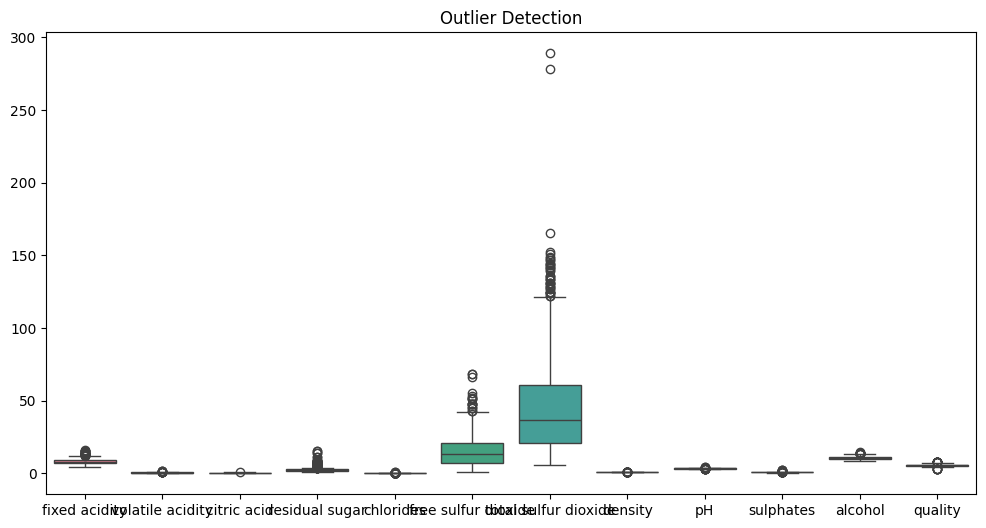

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.title("Outlier Detection")
plt.show()

In [ ]:
x = df.drop(['quality'],axis=1)
y=df['quality']

In [ ]:
scaler = StandardScaler()

In [ ]:
x_scaled = scaler.fit_transform(x)

In [ ]:
y_scaler = MinMaxScaler()

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.model_selection import ShuffleSplit , cross_val_score
cv=ShuffleSplit(n_splits=5, test_size =0.2, random_state=42)
cross_val_score(LogisticRegression(max_iter=5000),x_scaled,y,cv=cv).mean()

np.float64(0.5772925764192139)

### Model Training

### Logistic Regression

In [ ]:
LR = LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.9, fit_intercept = True, C = 10)

In [ ]:
LR.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, l1_ratio=0.9, penalty='elasticnet', solver='saga')

In [ ]:
LR_pred= LR.predict(x_test)

In [ ]:
accuracy_score(y_test,LR_pred)

0.62882096069869

## SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel = "rbf", gamma = "scale", C=10)

In [ ]:
svc.fit(x_train, y_train)

SVC(C=10)

In [ ]:
svc_pred = svc.predict(x_test)

In [ ]:
accuracy_score(y_test,svc_pred)

0.6768558951965066

## Decision Tree

In [ ]:
DT = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf =1, max_depth=50,criterion='entropy')


In [ ]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50)

In [ ]:
DT_pred = DT.predict(x_test)

In [ ]:
accuracy_score(y_test,DT_pred)

0.5807860262008734

## Accuaracy

/tmp/ipython-input-4041451680.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


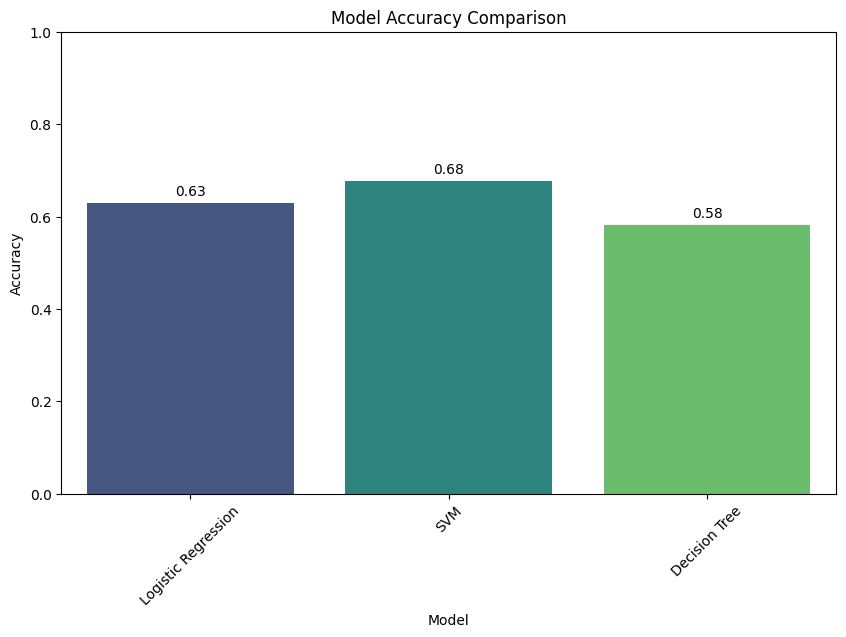

In [ ]:
models = {
    'Logistic Regression': LR,
    'SVM': svc,
    'Decision Tree': DT
}
accuracies = {}

for model_name, model in models.items():
    y_test_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracies[model_name] = accuracy

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")

for i, (model_name, accuracy) in enumerate(accuracies.items()):
    plt.text(i, accuracy + 0.01, f"{accuracy:.2f}", ha='center', va='bottom', fontsize=10)

plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()